In [2]:
import sys
import os

# Add the project root directory to Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Now your imports should work
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.preprocessing import load_and_clean_data, split_and_scale_data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
import joblib

In [3]:
df = load_and_clean_data("../data/diabetes.csv")
df.head()

c:\SEM-6\AI&ML\ML-Project\src\preprocessing.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean(), inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


Outcome
0    500
1    268
Name: count, dtype: int64


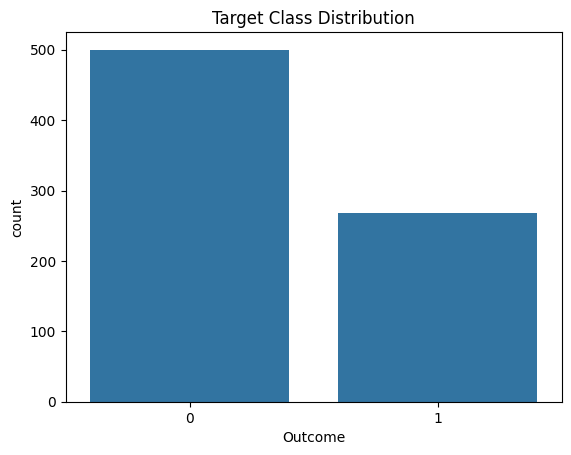

In [4]:
print(df['Outcome'].value_counts())
sns.countplot(x="Outcome", data=df)
plt.title("Target Class Distribution")
plt.show()

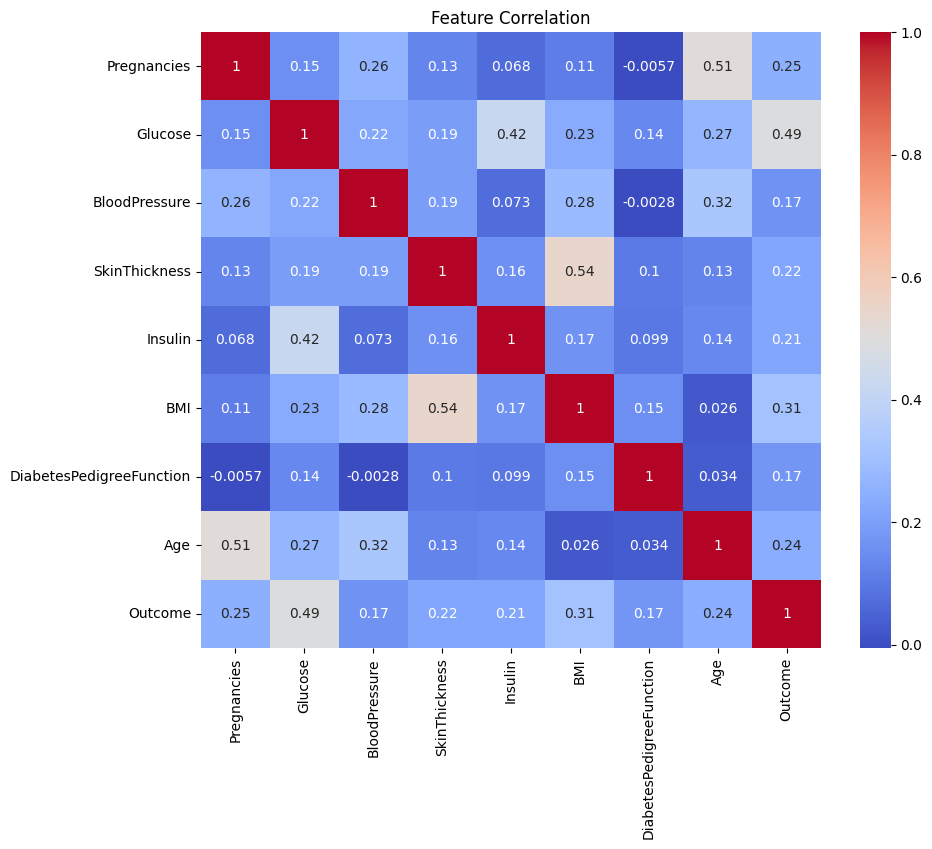

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [6]:
X_train, X_test, y_train, y_test = split_and_scale_data(df, "Outcome")
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



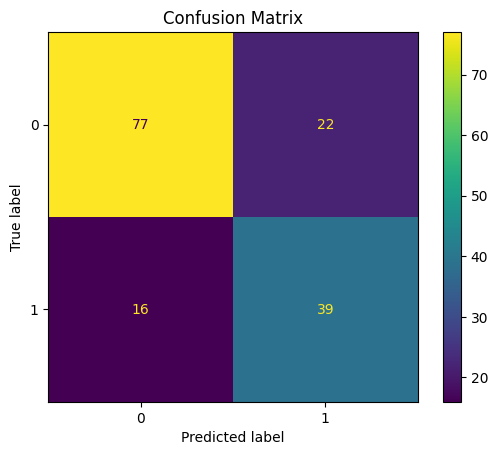

In [7]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.show()

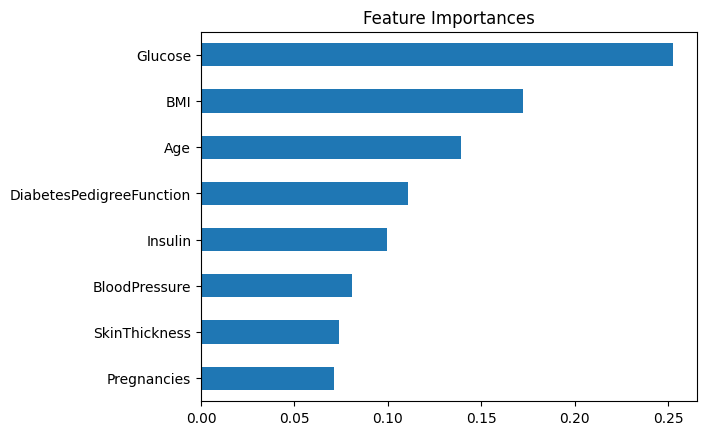

In [8]:
importances = pd.Series(model.feature_importances_, index=df.drop("Outcome", axis=1).columns)
importances.sort_values().plot(kind="barh")
plt.title("Feature Importances")
plt.show()